# Capstone: Vital Statistics of Professional Athletes

## Analysis Notebook for pro football players

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

In [2]:
# Read in football player CSV files into dataframes
all_football_df = pd.read_csv('./all_football.csv')
deceased_football_df = pd.read_csv('./deceased_football.csv')

In [3]:
all_football_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26545 entries, 0 to 26544
Data columns (total 11 columns):
Unnamed: 0    26545 non-null int64
all star      26545 non-null int64
birth date    26545 non-null object
birth year    26545 non-null int64
experience    24552 non-null float64
first year    24552 non-null float64
games         24397 non-null float64
last year     24552 non-null float64
link          26545 non-null object
name          26545 non-null object
position      24708 non-null object
dtypes: float64(4), int64(3), object(4)
memory usage: 2.2+ MB


In [4]:
deceased_football_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6781 entries, 0 to 6780
Data columns (total 13 columns):
Unnamed: 0    6781 non-null int64
age           6734 non-null float64
all star      6781 non-null int64
birth date    6736 non-null object
death date    6781 non-null object
death year    6781 non-null int64
experience    6645 non-null float64
first year    6645 non-null float64
games         6645 non-null float64
last year     6645 non-null float64
link          6781 non-null object
name          6781 non-null object
position      6762 non-null object
dtypes: float64(5), int64(3), object(5)
memory usage: 688.8+ KB


#### Drop the non-players (e.g. coaches, executives) from the dataframes

Because the Football Reference database included coaches and executives along with players, we need to excluded them from our analysis. The coaches and executives likely have a "NaN" listed in the number of games they played.

In [5]:
deceased_football_df[deceased_football_df['games'].isnull()].head()

,Unnamed: 0,age,all star,birth date,death date,death year,experience,first year,games,last year,link,name,position
8,8,42.0,0,2/17/1885,1/8/1928,1928,NaN,NaN,NaN,NaN,/coaches/FolwBo0.htm,Bob Folwell,Coach
42,42,54.0,0,10/3/1881,12/3/1935,1935,NaN,NaN,NaN,NaN,/coaches/BattDi0.htm,Dim Batterson,Coach
94,94,45.0,0,9/30/1895,8/10/1941,1941,NaN,NaN,NaN,NaN,/players/S/ShupWa00.htm,Walt Shupp,NaN
113,113,45.0,0,8/7/1897,10/27/1942,1942,NaN,NaN,NaN,NaN,/coaches/SachLe0.htm,Lenny Sachs,Coach
156,156,38.0,0,8/14/1906,2/19/1945,1945,NaN,NaN,NaN,NaN,/coaches/ChevJa0.htm,Jack Chevigny,Coach


In [6]:
all_football_players = all_football_df[all_football_df['games'].notnull()]
deceased_football_players = deceased_football_df[deceased_football_df['games'].notnull()]

In [7]:
all_football_players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24397 entries, 0 to 26544
Data columns (total 11 columns):
Unnamed: 0    24397 non-null int64
all star      24397 non-null int64
birth date    24397 non-null object
birth year    24397 non-null int64
experience    24397 non-null float64
first year    24397 non-null float64
games         24397 non-null float64
last year     24397 non-null float64
link          24397 non-null object
name          24397 non-null object
position      23568 non-null object
dtypes: float64(4), int64(3), object(4)
memory usage: 2.2+ MB


In [8]:
deceased_football_players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6645 entries, 0 to 6780
Data columns (total 13 columns):
Unnamed: 0    6645 non-null int64
age           6601 non-null float64
all star      6645 non-null int64
birth date    6603 non-null object
death date    6645 non-null object
death year    6645 non-null int64
experience    6645 non-null float64
first year    6645 non-null float64
games         6645 non-null float64
last year     6645 non-null float64
link          6645 non-null object
name          6645 non-null object
position      6644 non-null object
dtypes: float64(5), int64(3), object(5)
memory usage: 726.8+ KB


### Group the NFL players by when they were born, and when they died

In [9]:
nfl_birth_counts = all_football_players.groupby('birth year').count()

In [10]:
nfl_birth_counts.loc[1950:1970, 'link']

birth year
1950    248
1951    267
1952    263
1953    271
1954    289
1955    282
1956    309
1957    307
1958    312
1959    356
1960    372
1961    445
1962    478
1963    543
1964    575
1965    403
1966    297
1967    270
1968    282
1969    279
1970    346
Name: link, dtype: int64

In [11]:
nfl_death_counts = deceased_football_players.groupby('death year').count()

In [12]:
nfl_death_counts['link']

death year
1923      1
1924      1
1925      2
1926      1
1927      2
1928      4
1929      5
1930      3
1931      5
1932      6
1933      6
1934      5
1935      4
1936      7
1937      9
1938      6
1939      9
1940      6
1941     12
1942     17
1943     14
1944     20
1945     25
1946     15
1947     26
1948     20
1949     27
1950     23
1951     27
1952     26
       ... 
1989    129
1990    107
1991     84
1992    138
1993     99
1994    126
1995    114
1996    109
1997    127
1998    141
1999    115
2000    123
2001    140
2002    158
2003    118
2004    110
2005    131
2006    126
2007    127
2008    153
2009    137
2010    136
2011    138
2012    145
2013    140
2014    119
2015    140
2016    127
2017    118
2018     65
Name: link, Length: 96, dtype: int64

### Plot: number of pro football players born or died in a given year

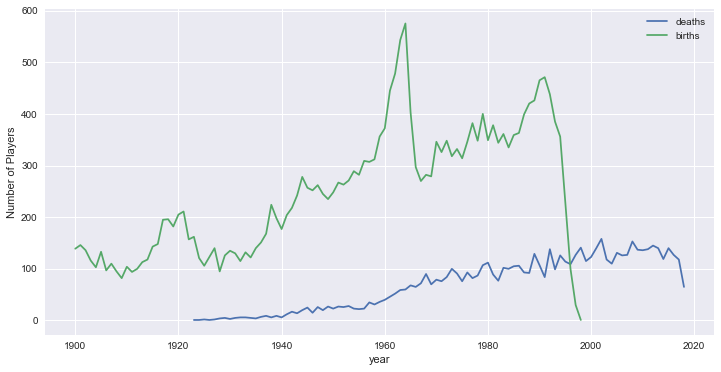

In [58]:
plt.figure(figsize=(12,6))
plt.plot(nfl_death_counts.index, nfl_death_counts['link'], label='deaths')
plt.plot(nfl_birth_counts.index, nfl_birth_counts['link'], label='births')
plt.xlabel('year')
plt.ylabel('Number of Players')
plt.legend()

### Expected number of deaths of football players

In [14]:
nfl_exp_deaths = {}
for year in range(2004, 2016):
    try:
        ssa = pd.read_csv('./ssa_tables/death_pct_' + str(year) + '.csv')
    except:
        continue
    total = 0
    for i in range(1, ssa.shape[0]):
        birth_year = year - i
        if birth_year in nfl_birth_counts.index:
            total += ssa.loc[i, 'male death pct'] * nfl_birth_counts.loc[birth_year, 'link']
    nfl_exp_deaths[year] = total

In [15]:
nfl_exp_deaths

{2004: 167.95053000000001,
 2005: 171.00664999999998,
 2006: 173.29892999999998,
 2007: 175.37184000000002,
 2009: 179.53788,
 2010: 181.4842099999999,
 2011: 183.76219,
 2013: 188.33315999999996,
 2014: 190.89314000000005,
 2015: 193.95191}

#### Plot of expected number of deaths versus actual number of deaths

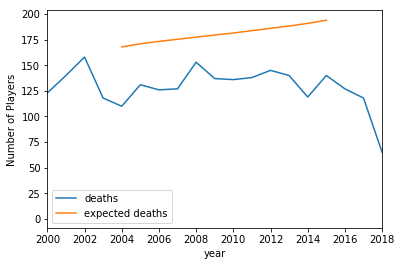

In [43]:
nfl_exp_deaths_df = pd.DataFrame.from_dict(nfl_exp_deaths, orient='index', columns=['exp deaths'])

plt.plot(nfl_death_counts.index, nfl_death_counts['link'], label='deaths')
plt.plot(nfl_exp_deaths_df, label='expected deaths')
plt.xlabel('year')
plt.ylabel('Number of Players')
plt.xlim(2000, 2018)
plt.legend()

### Compare Distributions of Ages at Death of NFL players in a given year versus that of the general population

In [16]:
us_live_births = pd.read_csv('./NCHS_-_Births_and_General_Fertility_Rates__United_States.csv')

us_live_births.set_index(['Year'], inplace=True)

In [17]:
for year in range(2004, 2016):
    try:
        death_pct = pd.read_csv('./ssa_tables/death_pct_' + str(year) + '.csv')
    except:
        continue
    us_est_deaths = [death_pct.loc[year-i+1, 'male death pct'] * us_live_births.loc[i, 'Birth Number'] 
                     for i in us_live_births.index if i <= year]
    probs = us_est_deaths[18:] / sum(us_est_deaths[18:])
    ages = len(us_est_deaths[18:])
    result = stats.ttest_ind(np.random.choice(range(18, 18+ages), 10000, replace=True, p=probs),
                             deceased_football_players[deceased_football_players['death year'] == year]['age'])
    print(year, result.pvalue)

2004 0.5164139580121863
2005 0.3711965933608846
2006 0.6150845089582115
2007 0.7806156444130236
2009 0.22597367849933675
2010 0.22209346721615927
2011 0.5867970057094571
2013 0.8780237681172377
2014 0.8861107630894918
2015 0.6266696158001901


In [18]:
deceased_football_players.head()

,Unnamed: 0,age,all star,birth date,death date,death year,experience,first year,games,last year,link,name,position
0,0,31.0,0,3/30/1892,6/6/1923,1923,2.0,1920.0,11.0,1921.0,/players/L/LaRoPa20.htm,Paul LaRosa,E
1,1,28.0,0,12/15/1895,9/9/1924,1924,1.0,1920.0,2.0,1920.0,/players/G/GepfSi20.htm,Sid Gepford,HB
2,2,23.0,0,9/28/1902,11/25/1925,1925,1.0,1925.0,1.0,1925.0,/players/H/HammCh20.htm,Ching Hammill,BB
3,3,34.0,0,8/7/1890,6/7/1925,1925,2.0,1921.0,9.0,1922.0,/players/W/WaldRa20.htm,Ralph Waldsmith,C-G
4,4,NaN,0,NaN,11/12/1926,1926,3.0,1924.0,22.0,1926.0,/players/F/FeisLo20.htm,Lou Feist,E-T-FB


#### Merge DataFrames

In [19]:
nfl_merged = pd.merge(all_football_players, 
         deceased_football_players[['age', 'death date', 'death year', 'link']],
         how='outer',
         left_on='link',
         right_on='link'
 )

In [20]:
nfl_merged.head()

,Unnamed: 0,all star,birth date,birth year,experience,first year,games,last year,link,name,position,age,death date,death year
0,0.0,0.0,11/13/1900,1900.0,4.0,1922.0,43.0,1925.0,/players/A/AndeEd20.htm,Eddie Anderson,E,73.0,4/26/1974,1974.0
1,1.0,0.0,7/12/1900,1900.0,1.0,1926.0,2.0,1926.0,/players/A/AshxJu20.htm,Juddy Ash,G,65.0,10/30/1965,1965.0
2,2.0,0.0,7/10/1900,1900.0,2.0,1924.0,3.0,1925.0,/players/A/AultCh20.htm,Chalmer Ault,T,78.0,5/18/1979,1979.0
3,3.0,0.0,12/9/1900,1900.0,1.0,1926.0,8.0,1926.0,/players/B/BabcSa20.htm,Sam Babcock,WB-FB-BB,59.0,5/1/1960,1960.0
4,4.0,0.0,11/4/1900,1900.0,5.0,1927.0,50.0,1931.0,/players/B/BakeBu20.htm,Bullet Baker,BB-WB-TB-HB,60.0,6/18/1961,1961.0


### Compute Percentage of players born in a given year who are deceased

Get a sense of how many early NFL players have an unknown death dates

In [22]:
nfl_merged[(nfl_merged['birth year'] < 1919) & (nfl_merged['death date'].isnull())]

,Unnamed: 0,all star,birth date,birth year,experience,first year,games,last year,link,name,position,age,death date,death year
11,11.0,0.0,12/5/1900,1900.0,1.0,1925.0,1.0,1925.0,/players/B/BeldLe20.htm,Les Belding,E-B,NaN,NaN,NaN
66,66.0,0.0,5/3/1900,1900.0,1.0,1921.0,1.0,1921.0,/players/H/HowsBi20.htm,Bill Howser,G-T,NaN,NaN,NaN
85,85.0,0.0,3/20/1900,1900.0,2.0,1921.0,3.0,1926.0,/players/M/McDoJo20.htm,John McDonald,T-G,NaN,NaN,NaN
108,109.0,0.0,2/22/1900,1900.0,2.0,1921.0,6.0,1926.0,/players/S/ScanJo20.htm,John Scanlon,TB-WB,NaN,NaN,NaN
122,124.0,0.0,2/2/1900,1900.0,1.0,1925.0,1.0,1925.0,/players/T/TobiRe20.htm,Rex Tobin,E,NaN,NaN,NaN
176,179.0,0.0,4/9/1901,1901.0,1.0,1926.0,2.0,1926.0,/players/F/FlanBi20.htm,Bill Flannigan,T,NaN,NaN,NaN
197,200.0,0.0,8/27/1901,1901.0,1.0,1921.0,1.0,1921.0,/players/H/HoweKa20.htm,Karl Hower,FB,NaN,NaN,NaN
224,227.0,0.0,11/30/1901,1901.0,10.0,1925.0,106.0,1934.0,/players/M/McBrJa20.htm,Jack McBride,FB-TB-HB,NaN,NaN,NaN
225,228.0,0.0,3/18/1901,1901.0,1.0,1922.0,1.0,1922.0,/players/M/McGrBr20.htm,Brian McGrath,G,NaN,NaN,NaN
259,263.0,0.0,4/6/1901,1901.0,1.0,1922.0,1.0,1922.0,/players/S/SpelFr20.htm,Frank Spellacy,E,NaN,NaN,NaN


In [24]:
nfl_merged_counts = nfl_merged.groupby('birth year').count()
nfl_merged_counts[['link', 'death year']]

,link,death year
birth year,,
1900.0,139,134
1901.0,146,140
1902.0,136,133
1903.0,116,108
1904.0,103,103
1905.0,133,124
1906.0,97,97
1907.0,110,110
1908.0,95,92


In [25]:
nfl_merged_counts['pct deaths recorded'] = nfl_merged_counts['death year'] / nfl_merged_counts['link']
nfl_merged_counts[['link', 'death year', 'pct deaths recorded']]

,link,death year,pct deaths recorded
birth year,,,
1900.0,139,134,0.964029
1901.0,146,140,0.958904
1902.0,136,133,0.977941
1903.0,116,108,0.931034
1904.0,103,103,1.000000
1905.0,133,124,0.932331
1906.0,97,97,1.000000
1907.0,110,110,1.000000
1908.0,95,92,0.968421


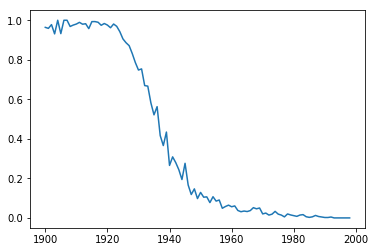

In [26]:
plt.plot(nfl_merged_counts['pct deaths recorded'])

In [27]:
nfl_merged_counts.loc[1920:1960, ['link', 'death year', 'pct deaths recorded']]

,link,death year,pct deaths recorded
birth year,,,
1920.0,205,200,0.975610
1921.0,211,203,0.962085
1922.0,157,154,0.980892
1923.0,162,157,0.969136
1924.0,121,114,0.942149
1925.0,106,96,0.905660
1926.0,123,109,0.886179
1927.0,140,122,0.871429
1928.0,95,79,0.831579


What was the average age of an NFL player who died in a given year?

In [61]:
nfl_merged.groupby('death year').mean()[['age']]

,age
death year,
1923.0,31.000000
1924.0,28.000000
1925.0,28.500000
1926.0,NaN
1927.0,27.500000
1928.0,28.500000
1929.0,28.800000
1930.0,32.666667
1931.0,36.400000


### Average age at death vs. length of career

In [54]:
died_since_2000 = deceased_football_players[deceased_football_players['death year'] > 1999]

In [55]:
died_since_2000.groupby('experience').count()

,Unnamed: 0,age,all star,birth date,death date,death year,first year,games,last year,link,name,position
experience,,,,,,,,,,,,
1.0,717,717,717,717,717,717,717,717,717,717,717,717
2.0,348,348,348,348,348,348,348,348,348,348,348,347
3.0,247,247,247,247,247,247,247,247,247,247,247,247
4.0,203,203,203,203,203,203,203,203,203,203,203,203
5.0,170,170,170,170,170,170,170,170,170,170,170,170
6.0,149,149,149,149,149,149,149,149,149,149,149,149
7.0,138,138,138,138,138,138,138,138,138,138,138,138
8.0,103,103,103,103,103,103,103,103,103,103,103,103
9.0,103,103,103,103,103,103,103,103,103,103,103,103


In [56]:
died_since_2000.groupby('experience').mean()

,Unnamed: 0,age,all star,death year,first year,games,last year
experience,,,,,,,
1.0,5415.277545,76.891213,0.008368,2007.981869,1954.818689,6.960948,1954.818689
2.0,5448.060345,74.735632,0.011494,2008.229885,1956.778736,17.965517,1958.166667
3.0,5503.117409,74.582996,0.056680,2008.631579,1957.263158,29.902834,1959.732794
4.0,5442.197044,70.492611,0.118227,2008.167488,1960.866995,42.625616,1964.344828
5.0,5577.082353,73.188235,0.223529,2009.152941,1959.170588,54.258824,1963.747059
6.0,5470.899329,70.510067,0.422819,2008.348993,1960.852349,68.214765,1966.315436
7.0,5611.702899,72.086957,0.579710,2009.442029,1960.130435,80.028986,1966.666667
8.0,5748.611650,70.912621,0.864078,2010.456311,1962.097087,95.776699,1969.543689
9.0,5712.514563,69.708738,0.990291,2010.174757,1963.058252,108.592233,1971.378641


### Classification Experiment: How well can we predict whether a player born between 1930 and 1945 is still alive?

In [28]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV

In [29]:
nfl_merged.columns

Index(['Unnamed: 0', 'all star', 'birth date', 'birth year', 'experience',
       'first year', 'games', 'last year', 'link', 'name', 'position', 'age',
       'death date', 'death year'],
      dtype='object')

In [30]:
silent_nfl = nfl_merged[(nfl_merged['birth year'] >= 1930) & (nfl_merged['birth year'] <= 1945)]

In [31]:
X = silent_nfl[['all star', 'birth year', 'experience', 'first year', 'games', 'last year']]
y = [(1 if np.isnan(year) else 0) for year in silent_nfl['death year']]

In [32]:
np.average(y)

0.5897613282601176

In [33]:
len(y), X.shape

(2891, (2891, 6))

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1978)

In [35]:
logistic_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1]
}

gs = GridSearchCV(
    LogisticRegression(),
    logistic_params, 
    verbose=1
)

gs_results = gs.fit(X_train, y_train)
gs.score(X_test, y_test)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    8.5s finished


0.6010471204188481

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

C:\Users\ehkst\Anaconda3\envs\dsi\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [37]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

dtc.score(X_test, y_test)

0.5675392670157068

In [38]:
cross_val_score(dtc, X_train, y=y_train)

array([0.57430341, 0.59752322, 0.54968944])

In [39]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.5905759162303665

In [40]:
cross_val_score(rf, X_train, y=y_train)

array([0.59287926, 0.61609907, 0.60093168])

Try taking in players' listed heights and weights as factors

In [44]:
nfl_htwt = pd.read_csv('./data/nfl_ht_wt.csv')

In [45]:
def to_inches(ht_string):
    ft_in = str(ht_string).split('-')
    return 12 * int(ft_in[0]) + int(ft_in[1])

In [46]:
nfl_htwt['inches'] = [to_inches(x) for x in nfl_htwt['height']]
nfl_htwt['pounds'] = [int(str(x).replace('lb', '')) for x in nfl_htwt['weight']]

In [47]:
silent_htwt = pd.merge(silent_nfl, nfl_htwt[['link', 'inches', 'pounds']], on='link')

In [48]:
silent_htwt['alive'] = y

In [49]:
import seaborn as sns

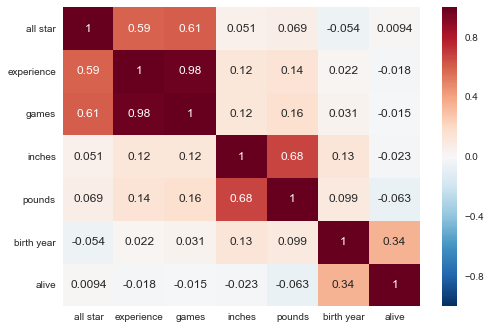

In [51]:
sns.heatmap(silent_htwt[['all star', 'experience', 'games', 'inches', 'pounds', 'birth year', 'alive']].corr(), annot=True)

In [52]:
deceased_silent = silent_htwt[silent_htwt['age'].notnull()]

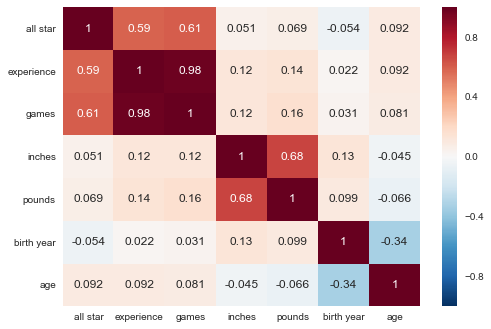

In [53]:
sns.heatmap(silent_htwt[['all star', 'experience', 'games', 'inches', 'pounds', 'birth year', 'age']].corr(), annot=True)

####  Save merged table

In [42]:
nfl_merged.to_csv('./data/nfl_merged.csv')